<a href="https://colab.research.google.com/github/rmbpablo/pedestrian_detect/blob/master/pedestrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Image Processing using Python

In [0]:
import cv2
import sys
import os

from matplotlib.pyplot import imshow

In [0]:
imagePath = sys.argv[1]

if imagePath == "-f":
    imagePath = "peds.jpeg"

# verify if the default files exist
if not os.path.exists(imagePath):
    !wget "https://raw.githubusercontent.com/rmbpablo/pedestrian_detect/master/peds.jpeg"

cascPath = "haarcascade_pedestrian.xml"
# cascPath = "pedestrian_another.xml"
# cascPath = "haarcascade_fullbody.xml"

# verify if the default files exist
if not os.path.exists(cascPath):
    !wget "https://raw.githubusercontent.com/rmbpablo/pedestrian_detect/master/haarcascade_pedestrian.xml"

pedscascade = cv2.CascadeClassifier(cascPath)

# Read the image
image = cv2.imread(imagePath)
#imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imshow(gray)

In [77]:
# detect pedestrian

peds = pedscascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=9,
    minSize=(30,30)
)

print("Found {0} pedestrian!".format(len(peds)))

Found 2 pedestrian!


Image written to file-system:  True


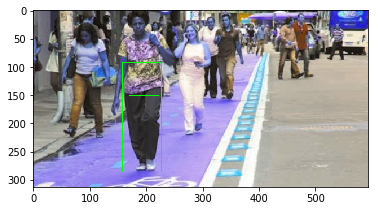

In [78]:
# Draw a rectangle aroung a pedestrian

for(x, y, w, h) in peds:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0))

imshow(image)
status = cv2.imwrite("peds_saved.jpg", image)
print("Image written to file-system: ", status)